In [17]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam



In [18]:
from tensorflow.keras.applications import VGG16

base = VGG16(
    weights="./Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    include_top=False,
    input_shape=(224,224,3)
)


In [19]:

# ---- Freeze base model ----
for layer in base.layers:
    layer.trainable = False


In [20]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [21]:
selected_classes = ['airplanes', 'ant']

train_data = train_gen.flow_from_directory(
    "./Object Detection(Ass6)/caltech-101-img", target_size=(224,224),
    batch_size=32, subset='training', classes=selected_classes
)

val_data = train_gen.flow_from_directory(
    "./Object Detection(Ass6)/caltech-101-img", target_size=(224,224),
    batch_size=32, subset='validation', classes=selected_classes
)


Found 674 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [22]:

# ---- Add Classifier on top of base model ----
model = Sequential([
    base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_data.num_classes, activation='softmax')
])

# ---- Compile (train only new layers) ----
model.compile(
    optimizer=Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [13]:

# ---- Train ----
model.fit(train_data, validation_data=val_data, epochs=5)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.9304 - loss: 0.6417 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.9826 - loss: 0.0785 - val_accuracy: 0.9762 - val_loss: 0.0585
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 320s 15s/step - accuracy: 0.9905 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 1.4986e-04
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 215s 11s/step - accuracy: 0.9953 - loss: 0.0425 - val_accuracy: 0.9905 - val_loss: 0.0317
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 269s 13s/step - accuracy: 0.9984 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 4.3517e-05


In [14]:
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 2.6201e-04
Validation Loss: 0.0003
Validation Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


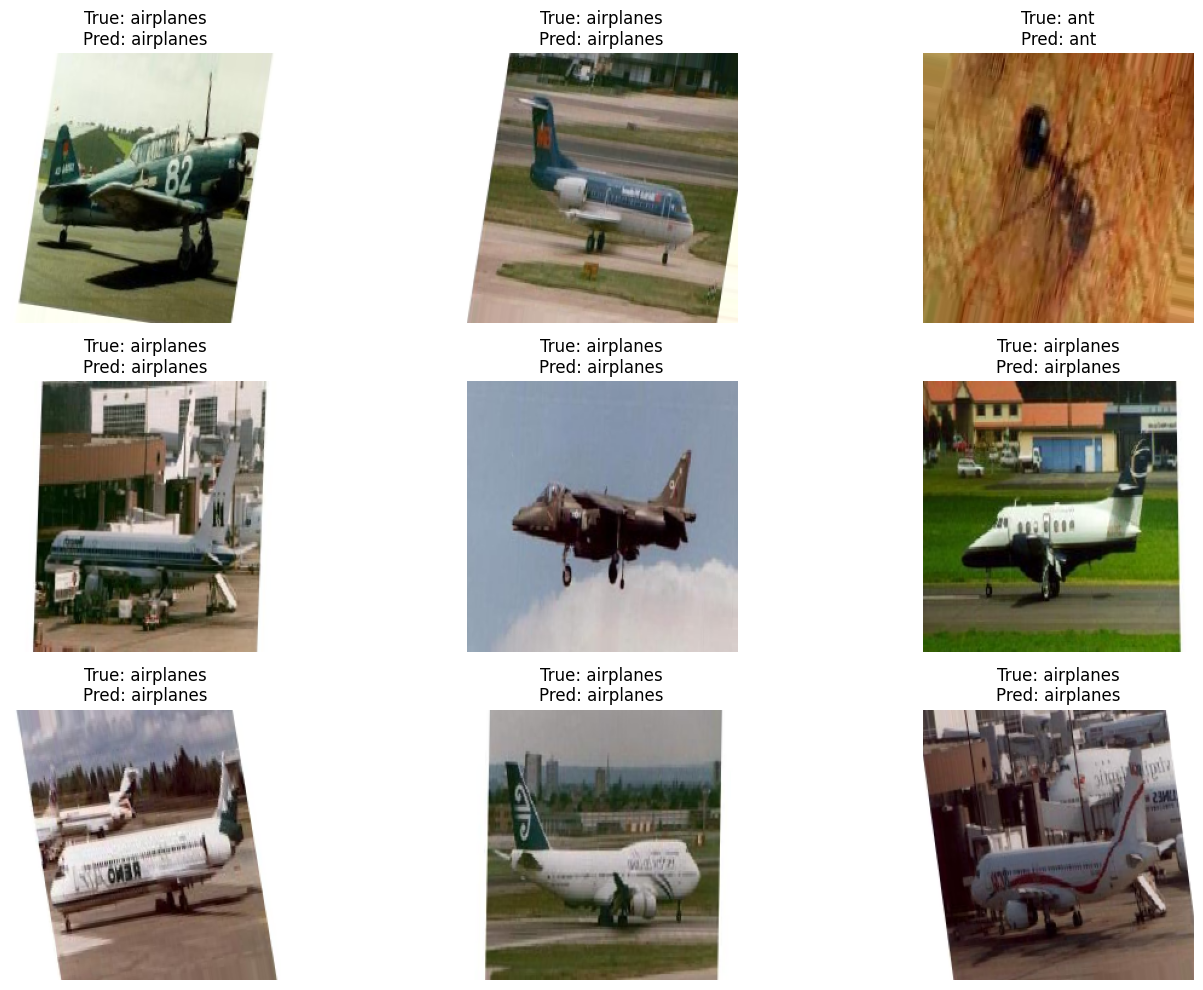


Batch Accuracy: 32/32 = 100.00%


In [16]:
import numpy as np

import matplotlib.pyplot as plt

# Get a batch of validation images
images, labels = next(val_data)

# Make predictions
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

# Display some samples with predictions
plt.figure(figsize=(15, 10))
for i in range(min(9, len(images))):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {selected_classes[true_classes[i]]}\nPred: {selected_classes[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print accuracy for this batch
correct = np.sum(predicted_classes == true_classes)
print(f"\nBatch Accuracy: {correct}/{len(images)} = {correct/len(images)*100:.2f}%")